In [2]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.engine.sequential import Sequential

RANDOM_SEED = 42

C:\Users\HP\anaconda3\envs\machinevision\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HP\anaconda3\envs\machinevision\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HP\anaconda3\envs\machinevision\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HP\anaconda3\envs\machinevis

# Specify each path

In [3]:
dataset = 'Data2.csv'
model_save_path = 'Skeleton_Input.hdf5'
tflite_save_path = 'Skeleton_Input.tflite'

# Set number of classes

In [4]:
NUM_CLASSES = 24

# Dataset reading

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.80, random_state=RANDOM_SEED)



In [8]:
X_train[0].shape

(42,)

# Model building

In [9]:
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(42, ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])



In [10]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 42)               168       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 batch_normalization_1 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 batch_normalization_2 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                        

In [11]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=True)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [12]:
# Model compilation
# model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics=['acc', 'mse'])


# Model training

In [14]:
# model.fit(
#     X_train,
#     y_train,
#     epochs=100,
#     batch_size=128,
#     validation_data=(X_test, y_test),
#     callbacks=[cp_callback, es_callback]
# )

hist = model.fit(X_train, y_train, epochs=350, batch_size=128, validation_data=(X_test,y_test), callbacks=[cp_callback, es_callback])

Epoch 1/350
19/26 [====================>.........] - ETA: 0s - loss: 3.4250 - acc: 0.0518 - mse: 231.5902 
Epoch 1: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 4s 39ms/step - loss: 3.3755 - acc: 0.0632 - mse: 232.2734 - val_loss: 3.1956 - val_acc: 0.0459 - val_mse: 220.3609
Epoch 2/350
22/26 [========================>.....] - ETA: 0s - loss: 3.0689 - acc: 0.1119 - mse: 232.0682
Epoch 2: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 13ms/step - loss: 3.0518 - acc: 0.1182 - mse: 232.2735 - val_loss: 3.1385 - val_acc: 0.0857 - val_mse: 220.3609
Epoch 3/350
20/26 [======================>.......] - ETA: 0s - loss: 2.8689 - acc: 0.1496 - mse: 231.1764
Epoch 3: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 12ms/step - loss: 2.8457 - acc: 0.1536 - mse: 232.2735 - val_loss: 3.0727 - val_acc: 0.0857 - val_mse: 220.3610
Epoch 4/350
20/26 [======================>.......] - ETA: 0s - loss: 2.6919 - 

Epoch 28/350
19/26 [====================>.........] - ETA: 0s - loss: 1.1683 - acc: 0.7122 - mse: 231.3425
Epoch 28: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 1.1602 - acc: 0.7158 - mse: 232.2823 - val_loss: 1.1763 - val_acc: 0.7150 - val_mse: 220.3709
Epoch 29/350
22/26 [========================>.....] - ETA: 0s - loss: 1.1190 - acc: 0.7230 - mse: 230.8601
Epoch 29: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 1.1189 - acc: 0.7198 - mse: 232.2828 - val_loss: 1.1459 - val_acc: 0.7138 - val_mse: 220.3714
Epoch 30/350
21/26 [=======================>......] - ETA: 0s - loss: 1.0933 - acc: 0.7329 - mse: 232.1298
Epoch 30: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 1.0815 - acc: 0.7379 - mse: 232.2833 - val_loss: 1.1107 - val_acc: 0.7198 - val_mse: 220.3718
Epoch 31/350
20/26 [======================>.......] - ETA: 0s - loss: 1.0

Epoch 55/350
21/26 [=======================>......] - ETA: 0s - loss: 0.5854 - acc: 0.8776 - mse: 233.5790
Epoch 55: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.5908 - acc: 0.8764 - mse: 232.2917 - val_loss: 0.6136 - val_acc: 0.8853 - val_mse: 220.3799
Epoch 56/350
22/26 [========================>.....] - ETA: 0s - loss: 0.5797 - acc: 0.8888 - mse: 232.7124
Epoch 56: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 12ms/step - loss: 0.5786 - acc: 0.8869 - mse: 232.2919 - val_loss: 0.6011 - val_acc: 0.8913 - val_mse: 220.3801
Epoch 57/350
21/26 [=======================>......] - ETA: 0s - loss: 0.5671 - acc: 0.8869 - mse: 231.2449
Epoch 57: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.5617 - acc: 0.8866 - mse: 232.2924 - val_loss: 0.5957 - val_acc: 0.8792 - val_mse: 220.3804
Epoch 58/350
22/26 [========================>.....] - ETA: 0s - loss: 0.5

Epoch 82/350
21/26 [=======================>......] - ETA: 0s - loss: 0.3567 - acc: 0.9475 - mse: 232.6514
Epoch 82: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.3628 - acc: 0.9456 - mse: 232.2975 - val_loss: 0.3731 - val_acc: 0.9541 - val_mse: 220.3858
Epoch 83/350
21/26 [=======================>......] - ETA: 0s - loss: 0.3660 - acc: 0.9475 - mse: 231.7912
Epoch 83: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.3675 - acc: 0.9444 - mse: 232.2974 - val_loss: 0.3650 - val_acc: 0.9577 - val_mse: 220.3860
Epoch 84/350
19/26 [====================>.........] - ETA: 0s - loss: 0.3703 - acc: 0.9453 - mse: 233.5169
Epoch 84: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.3661 - acc: 0.9432 - mse: 232.2974 - val_loss: 0.3612 - val_acc: 0.9517 - val_mse: 220.3862
Epoch 85/350
21/26 [=======================>......] - ETA: 0s - loss: 0.3

26/26 [==============================] - 0s 11ms/step - loss: 0.2605 - acc: 0.9628 - mse: 232.3010 - val_loss: 0.2608 - val_acc: 0.9686 - val_mse: 220.3896
Epoch 109/350
24/26 [==========================>...] - ETA: 0s - loss: 0.2616 - acc: 0.9619 - mse: 232.9116
Epoch 109: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.2601 - acc: 0.9619 - mse: 232.3011 - val_loss: 0.2569 - val_acc: 0.9674 - val_mse: 220.3897
Epoch 110/350
21/26 [=======================>......] - ETA: 0s - loss: 0.2692 - acc: 0.9557 - mse: 232.9642
Epoch 110: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.2636 - acc: 0.9562 - mse: 232.3010 - val_loss: 0.2574 - val_acc: 0.9662 - val_mse: 220.3899
Epoch 111/350
20/26 [======================>.......] - ETA: 0s - loss: 0.2554 - acc: 0.9609 - mse: 234.1897
Epoch 111: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.249

Epoch 135/350
19/26 [====================>.........] - ETA: 0s - loss: 0.2083 - acc: 0.9688 - mse: 230.8051
Epoch 135: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.2018 - acc: 0.9698 - mse: 232.3032 - val_loss: 0.2001 - val_acc: 0.9795 - val_mse: 220.3923
Epoch 136/350
23/26 [=========================>....] - ETA: 0s - loss: 0.2017 - acc: 0.9721 - mse: 231.9837
Epoch 136: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.2020 - acc: 0.9728 - mse: 232.3032 - val_loss: 0.1988 - val_acc: 0.9758 - val_mse: 220.3923
Epoch 137/350
22/26 [========================>.....] - ETA: 0s - loss: 0.1941 - acc: 0.9666 - mse: 233.1404
Epoch 137: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.1934 - acc: 0.9683 - mse: 232.3038 - val_loss: 0.1891 - val_acc: 0.9795 - val_mse: 220.3926
Epoch 138/350
21/26 [=======================>......] - ETA: 0s - lo

24/26 [==========================>...] - ETA: 0s - loss: 0.1516 - acc: 0.9811 - mse: 232.0933
Epoch 161: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.1522 - acc: 0.9813 - mse: 232.3053 - val_loss: 0.1536 - val_acc: 0.9807 - val_mse: 220.3941
Epoch 162/350
20/26 [======================>.......] - ETA: 0s - loss: 0.1541 - acc: 0.9793 - mse: 233.8246
Epoch 162: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.1581 - acc: 0.9776 - mse: 232.3051 - val_loss: 0.1521 - val_acc: 0.9819 - val_mse: 220.3941
Epoch 163/350
21/26 [=======================>......] - ETA: 0s - loss: 0.1505 - acc: 0.9747 - mse: 232.7269
Epoch 163: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 12ms/step - loss: 0.1589 - acc: 0.9722 - mse: 232.3052 - val_loss: 0.1536 - val_acc: 0.9807 - val_mse: 220.3941
Epoch 164/350
21/26 [=======================>......] - ETA: 0s - loss: 0.1434 - a

26/26 [==============================] - 0s 11ms/step - loss: 0.1309 - acc: 0.9776 - mse: 232.3063 - val_loss: 0.1273 - val_acc: 0.9855 - val_mse: 220.3952
Epoch 188/350
23/26 [=========================>....] - ETA: 0s - loss: 0.1360 - acc: 0.9786 - mse: 232.0327
Epoch 188: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.1325 - acc: 0.9794 - mse: 232.3063 - val_loss: 0.1276 - val_acc: 0.9843 - val_mse: 220.3953
Epoch 189/350
21/26 [=======================>......] - ETA: 0s - loss: 0.1235 - acc: 0.9784 - mse: 230.4291
Epoch 189: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.1249 - acc: 0.9770 - mse: 232.3066 - val_loss: 0.1275 - val_acc: 0.9843 - val_mse: 220.3953
Epoch 190/350
21/26 [=======================>......] - ETA: 0s - loss: 0.1299 - acc: 0.9754 - mse: 231.7189
Epoch 190: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 12ms/step - loss: 0.130

Epoch 214/350
24/26 [==========================>...] - ETA: 0s - loss: 0.1056 - acc: 0.9814 - mse: 232.2678
Epoch 214: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 12ms/step - loss: 0.1117 - acc: 0.9800 - mse: 232.3073 - val_loss: 0.1192 - val_acc: 0.9795 - val_mse: 220.3961
Epoch 215/350
21/26 [=======================>......] - ETA: 0s - loss: 0.0998 - acc: 0.9851 - mse: 233.0699
Epoch 215: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.1019 - acc: 0.9828 - mse: 232.3074 - val_loss: 0.1079 - val_acc: 0.9867 - val_mse: 220.3962
Epoch 216/350
22/26 [========================>.....] - ETA: 0s - loss: 0.1143 - acc: 0.9783 - mse: 230.8910
Epoch 216: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.1131 - acc: 0.9794 - mse: 232.3071 - val_loss: 0.1069 - val_acc: 0.9879 - val_mse: 220.3962
Epoch 217/350
22/26 [========================>.....] - ETA: 0s - lo

21/26 [=======================>......] - ETA: 0s - loss: 0.0912 - acc: 0.9829 - mse: 232.5655
Epoch 240: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.0932 - acc: 0.9825 - mse: 232.3079 - val_loss: 0.0947 - val_acc: 0.9891 - val_mse: 220.3969
Epoch 241/350
20/26 [======================>.......] - ETA: 0s - loss: 0.0911 - acc: 0.9855 - mse: 233.7236
Epoch 241: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.0936 - acc: 0.9837 - mse: 232.3079 - val_loss: 0.0951 - val_acc: 0.9903 - val_mse: 220.3969
Epoch 242/350
24/26 [==========================>...] - ETA: 0s - loss: 0.0939 - acc: 0.9844 - mse: 231.4560
Epoch 242: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.0950 - acc: 0.9840 - mse: 232.3078 - val_loss: 0.0923 - val_acc: 0.9915 - val_mse: 220.3969
Epoch 243/350
20/26 [======================>.......] - ETA: 0s - loss: 0.0875 - a

26/26 [==============================] - 0s 10ms/step - loss: 0.0851 - acc: 0.9849 - mse: 232.3084 - val_loss: 0.0827 - val_acc: 0.9903 - val_mse: 220.3973
Epoch 267/350
21/26 [=======================>......] - ETA: 0s - loss: 0.0790 - acc: 0.9855 - mse: 233.6847
Epoch 267: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.0801 - acc: 0.9861 - mse: 232.3085 - val_loss: 0.0814 - val_acc: 0.9928 - val_mse: 220.3973
Epoch 268/350
20/26 [======================>.......] - ETA: 0s - loss: 0.0825 - acc: 0.9848 - mse: 233.3062
Epoch 268: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.0823 - acc: 0.9855 - mse: 232.3084 - val_loss: 0.0837 - val_acc: 0.9879 - val_mse: 220.3973
Epoch 269/350
20/26 [======================>.......] - ETA: 0s - loss: 0.0842 - acc: 0.9848 - mse: 231.0302
Epoch 269: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 12ms/step - loss: 0.082

Epoch 293/350
24/26 [==========================>...] - ETA: 0s - loss: 0.0768 - acc: 0.9854 - mse: 230.9852
Epoch 293: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.0771 - acc: 0.9855 - mse: 232.3087 - val_loss: 0.0738 - val_acc: 0.9928 - val_mse: 220.3977
Epoch 294/350
22/26 [========================>.....] - ETA: 0s - loss: 0.0722 - acc: 0.9886 - mse: 234.1289
Epoch 294: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.0704 - acc: 0.9885 - mse: 232.3090 - val_loss: 0.0755 - val_acc: 0.9940 - val_mse: 220.3977
Epoch 295/350
23/26 [=========================>....] - ETA: 0s - loss: 0.0716 - acc: 0.9864 - mse: 232.4306
Epoch 295: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.0744 - acc: 0.9855 - mse: 232.3088 - val_loss: 0.0766 - val_acc: 0.9940 - val_mse: 220.3978
Epoch 296/350
23/26 [=========================>....] - ETA: 0s - lo

22/26 [========================>.....] - ETA: 0s - loss: 0.0646 - acc: 0.9890 - mse: 233.8804
Epoch 319: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.0638 - acc: 0.9891 - mse: 232.3093 - val_loss: 0.0697 - val_acc: 0.9891 - val_mse: 220.3981
Epoch 320/350
24/26 [==========================>...] - ETA: 0s - loss: 0.0639 - acc: 0.9906 - mse: 231.8184
Epoch 320: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.0628 - acc: 0.9909 - mse: 232.3093 - val_loss: 0.0728 - val_acc: 0.9903 - val_mse: 220.3980
Epoch 321/350
19/26 [====================>.........] - ETA: 0s - loss: 0.0629 - acc: 0.9860 - mse: 230.3896
Epoch 321: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.0629 - acc: 0.9861 - mse: 232.3092 - val_loss: 0.0681 - val_acc: 0.9928 - val_mse: 220.3980
Epoch 322/350
23/26 [=========================>....] - ETA: 0s - loss: 0.0633 - a

26/26 [==============================] - 0s 11ms/step - loss: 0.0597 - acc: 0.9906 - mse: 232.3093 - val_loss: 0.0664 - val_acc: 0.9903 - val_mse: 220.3983
Epoch 346/350
19/26 [====================>.........] - ETA: 0s - loss: 0.0528 - acc: 0.9922 - mse: 231.1210
Epoch 346: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 12ms/step - loss: 0.0559 - acc: 0.9912 - mse: 232.3095 - val_loss: 0.0666 - val_acc: 0.9891 - val_mse: 220.3983
Epoch 347/350
19/26 [====================>.........] - ETA: 0s - loss: 0.0628 - acc: 0.9885 - mse: 230.8350
Epoch 347: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.0618 - acc: 0.9885 - mse: 232.3092 - val_loss: 0.0654 - val_acc: 0.9915 - val_mse: 220.3983
Epoch 348/350
22/26 [========================>.....] - ETA: 0s - loss: 0.0550 - acc: 0.9925 - mse: 231.7496
Epoch 348: saving model to Skeleton_Input.hdf5
26/26 [==============================] - 0s 11ms/step - loss: 0.057

In [15]:
import matplotlib.pyplot as plt


loss, acc, mse = model.evaluate(X_test, y_test)
print(f"Loss is {loss},\nAccuracy is {acc * 100},\nMSE is {mse}")

26/26 [==============================] - 0s 4ms/step - loss: 0.0672 - acc: 0.9915 - mse: 220.3983
Loss is 0.06716065108776093,
Accuracy is 99.15459156036377,
MSE is 220.39833068847656


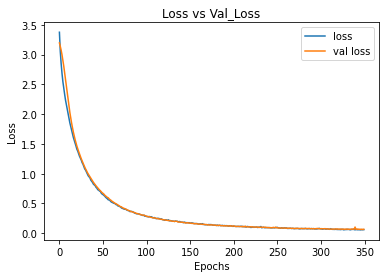

In [16]:
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.title('Loss vs Val_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

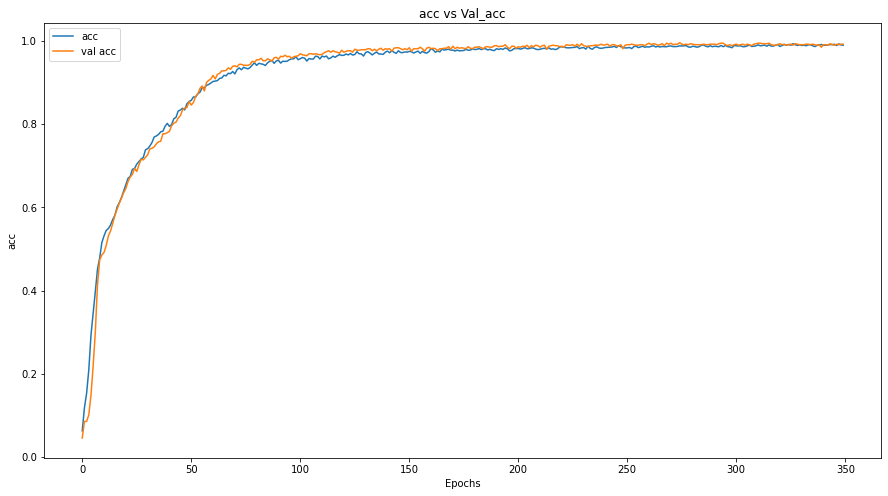

In [17]:
plt.figure(figsize=(15,8))
plt.plot(hist.history['acc'], label = 'acc')
plt.plot(hist.history['val_acc'], label='val acc')
plt.title("acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [18]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

ValueError: No model config found in the file at <tensorflow.python.platform.gfile.GFile object at 0x000001DF245E4908>.

In [19]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 381ms/step
[2.0215498e-06 4.2945237e-04 1.5349067e-05 1.4207905e-02 2.0917634e-05
 7.6481126e-07 1.1030585e-04 1.7922054e-04 9.4478884e-05 1.2956014e-05
 1.5671104e-04 1.9462925e-08 9.3302733e-06 6.8179793e-07 7.1291550e-04
 3.1053683e-06 3.5948074e-01 8.8237010e-07 1.0106949e-07 6.2333155e-01
 8.9553499e-04 3.2569381e-04 8.0383288e-06 1.2313184e-06]
19


# Confusion matrix

26/26 [==============================] - 0s 4ms/step


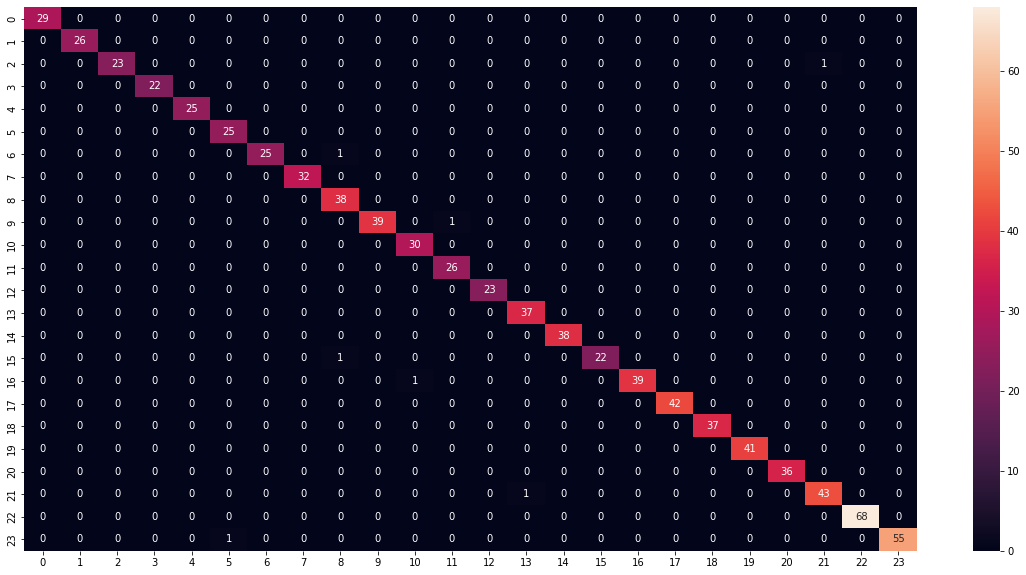

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        26
           2       1.00      0.96      0.98        24
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        25
           5       0.96      1.00      0.98        25
           6       1.00      0.96      0.98        26
           7       1.00      1.00      1.00        32
           8       0.95      1.00      0.97        38
           9       1.00      0.97      0.99        40
          10       0.97      1.00      0.98        30
          11       0.96      1.00      0.98        26
          12       1.00      1.00      1.00        23
          13       0.97      1.00      0.99        37
          14       1.00      1.00      1.00        38
          15       1.00      0.96      0.98        23
          16       1.00      0.97      0.99        40
     

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [22]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [23]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpyxu0hzef\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpyxu0hzef\assets


8284

# Inference test

In [24]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [25]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [26]:
print (input_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([ 1, 42]), 'shape_signature': array([-1, 42]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [27]:
print (output_details)

[{'name': 'StatefulPartitionedCall:0', 'index': 11, 'shape': array([ 1, 24]), 'shape_signature': array([-1, 24]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [28]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [29]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 6.01 ms


In [30]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.02156525e-06 4.29453561e-04 1.53489927e-05 1.42079685e-02
 2.09177742e-05 7.64817230e-07 1.10305446e-04 1.79221373e-04
 9.44789790e-05 1.29560267e-05 1.56711787e-04 1.94629983e-08
 9.33023784e-06 6.81794575e-07 7.12923706e-04 3.10538053e-06
 3.59484166e-01 8.82371921e-07 1.01070178e-07 6.23328030e-01
 8.95528763e-04 3.25693021e-04 8.03837520e-06 1.23131838e-06]
19
